#### **Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

#### **DATA PREPROCESSING**

In [2]:
# data anaylsing
data = pd.read_csv(r"C:\Users\Subham Pathak\Desktop\AI\ML\DATA_SETS\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
x = data[['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age']]
y = data['Outcome']
print(x)
print(y)

     Pregnancies  Glucose  Insulin   BMI  Age
0              6      148        0  33.6   50
1              1       85        0  26.6   31
2              8      183        0  23.3   32
3              1       89       94  28.1   21
4              0      137      168  43.1   33
..           ...      ...      ...   ...  ...
763           10      101      180  32.9   63
764            2      122        0  36.8   27
765            5      121      112  26.2   30
766            1      126        0  30.1   47
767            1       93        0  30.4   23

[768 rows x 5 columns]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)

In [7]:
scalar = StandardScaler()

x_train = scalar.fit_transform(x_train)
x_test= scalar.fit_transform(x_test)

#### **1st Method**

In [8]:
# 1ST METHOD
print(x.shape)
print(np.sqrt(x.shape[0]))

(768, 5)
27.712812921102035


In [9]:
k = 27
model = KNeighborsClassifier(n_neighbors = k)
# training the model
model.fit(x_train, y_train)

,n_neighbors,27
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [10]:
y_prediction = model.predict(x_test)
print(y_prediction.shape)

accuracy = accuracy_score(y_test, y_prediction)
print(accuracy*100)


confusion_matrix(y_test, y_prediction)

(154,)
72.72727272727273


array([[85, 15],
       [27, 27]])

#### **2nd Method**

In [11]:
# 2nd Method

accuracies = []
new = []

for i in range(1,27):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    accuracies.append(accuracy_score(y_test, model.predict(x_test)))
    
maximum = max(accuracies)
for i in range(1,26):
    if (accuracies[i] == maximum):
        print(f"k = {i}")
    else:
        continue
    

# by this we got to know, at how much value of k, accuracy should be maximum
    


k = 21
k = 24


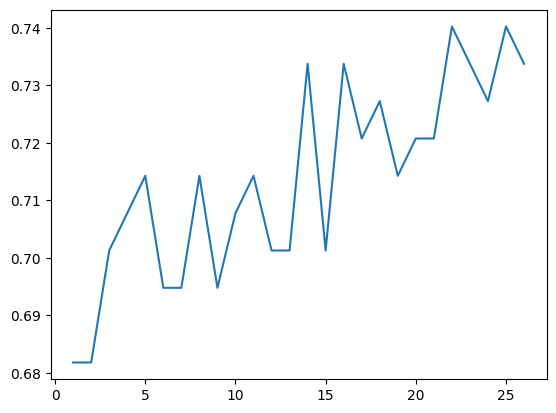

In [12]:
plt.plot(range(1,27), accuracies)

In [13]:
model = KNeighborsClassifier(n_neighbors = 21)
model.fit(x_train, y_train)
y_prediction = model.predict(x_test)
accuracy_score(y_test, y_prediction)

0.7207792207792207

In [14]:
def predict_output():
    # regnancies  Glucose  Insulin   BMI  Age
    age = int(input("Enter the age of the person: "))
    Glucose = int(input("Enter the glucose: "))
    Insulin = int(input("Enter the Insulin: "))
    BMI = int(input("Enter the BMI: "))
    pregnancies = int(input("How many times the person is pregnant"))
    new = np.array([[pregnancies, Glucose, Insulin, BMI, age]])
    new = scalar.fit_transform(new)
    if model.predict(new)[0] == 0:
        return "Non-Diabetic"
    else:
        return "Diabetic"

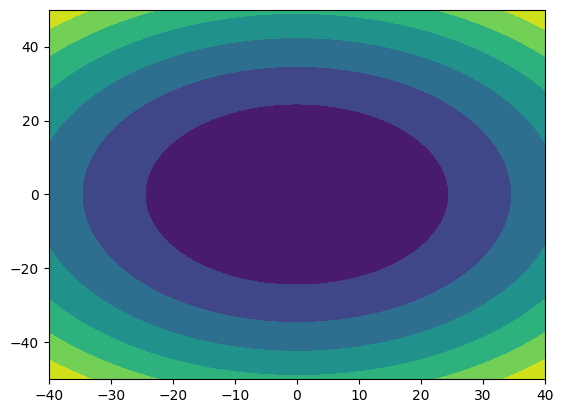

In [15]:
# predict_output()
x = np.array([1,2,3])
y = np.array([5,6,7,8])
xx,yy=np.meshgrid(x,y)


x = np.linspace(-40,40,100)
y = np.linspace(-50,50,100)
xx,yy = np.meshgrid(x,y)

z = xx**2 + yy**2

plt.contourf(xx, yy, z)

#### **Creating a Sample Meshgrids**

In [16]:
x = np.array([1,2,3])
y = np.array([5,6,7,8])
xx,yy=np.meshgrid(x,y)



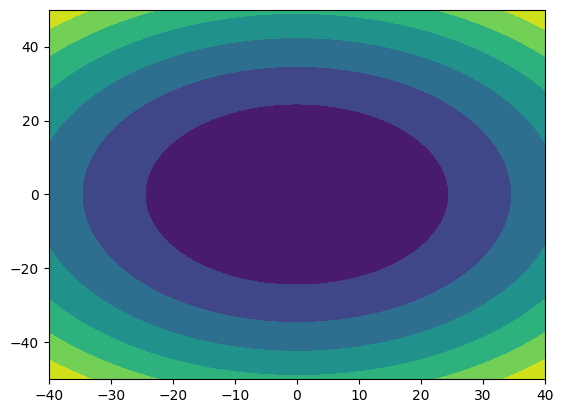

In [17]:
x = np.linspace(-40,40,100)
y = np.linspace(-50,50,100)
xx,yy = np.meshgrid(x,y)

z = xx**2 + yy**2

plt.contourf(xx, yy, z)

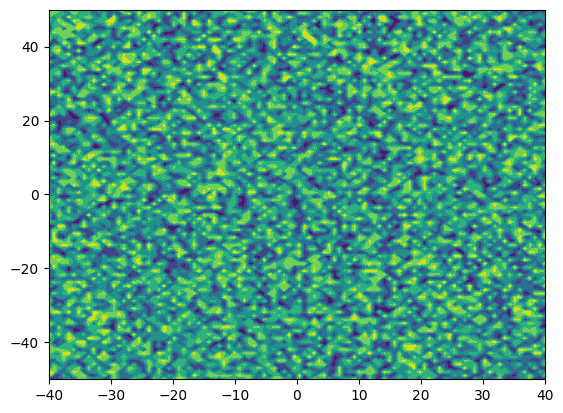

In [18]:
z = np.random.random((100,100))
plt.contourf(xx,yy,z)